In [1]:
## Read the features. Eliminate those with correlation greater than 0.7
## Construct minimum spanning tree.

In [52]:
features_folder = '/home/raghuram/Desktop/radiomics/TEXTURES'

In [53]:
import os 
import pandas as pd

In [54]:
df = pd.read_csv(os.path.join(features_folder, 'expt_t1ce.csv'))

In [55]:
df = df[df['experiment_number'] == 1]
idh_labels = df['IDH1']
p19q_labels = df['1p_19q_co_del_status']
df.drop(columns=['scanner_model', 'scanner_manufacturer', 'flip_angle', 'mag_field_strength', 'repetition_time', 
                 'excitation_time', 'experiment_number', 'scale', 'algo', 'ng', 'Tumor', 'VOLUME_ET', 'VOLUME_NET', 
                 'VOLUME_ED', 'VOLUME_TC', 'VOLUME_BRAIN', 'VOLUME_WT', '1p_19q_co_del_status', 
                 'IDH1'], inplace=True)

In [6]:
df.shape

(75, 42)

In [7]:
import numpy as np
feature_matrix  = np.array(df)

In [253]:
feature_mean = np.mean(feature_matrix, axis=0)
corr_matrix = np.array(df.corr())

In [270]:
import copy
A = copy.deepcopy(corr_matrix)
A[A>0.7]=0
A[A<-0.7]=0
A[A!= 0] = 1

In [271]:
type(A)

numpy.ndarray

In [272]:
import networkx as nx

In [273]:
G = nx.from_numpy_matrix(A)
T = nx.minimum_spanning_tree(G)

In [327]:
A_adj = nx.adjacency_matrix(T)

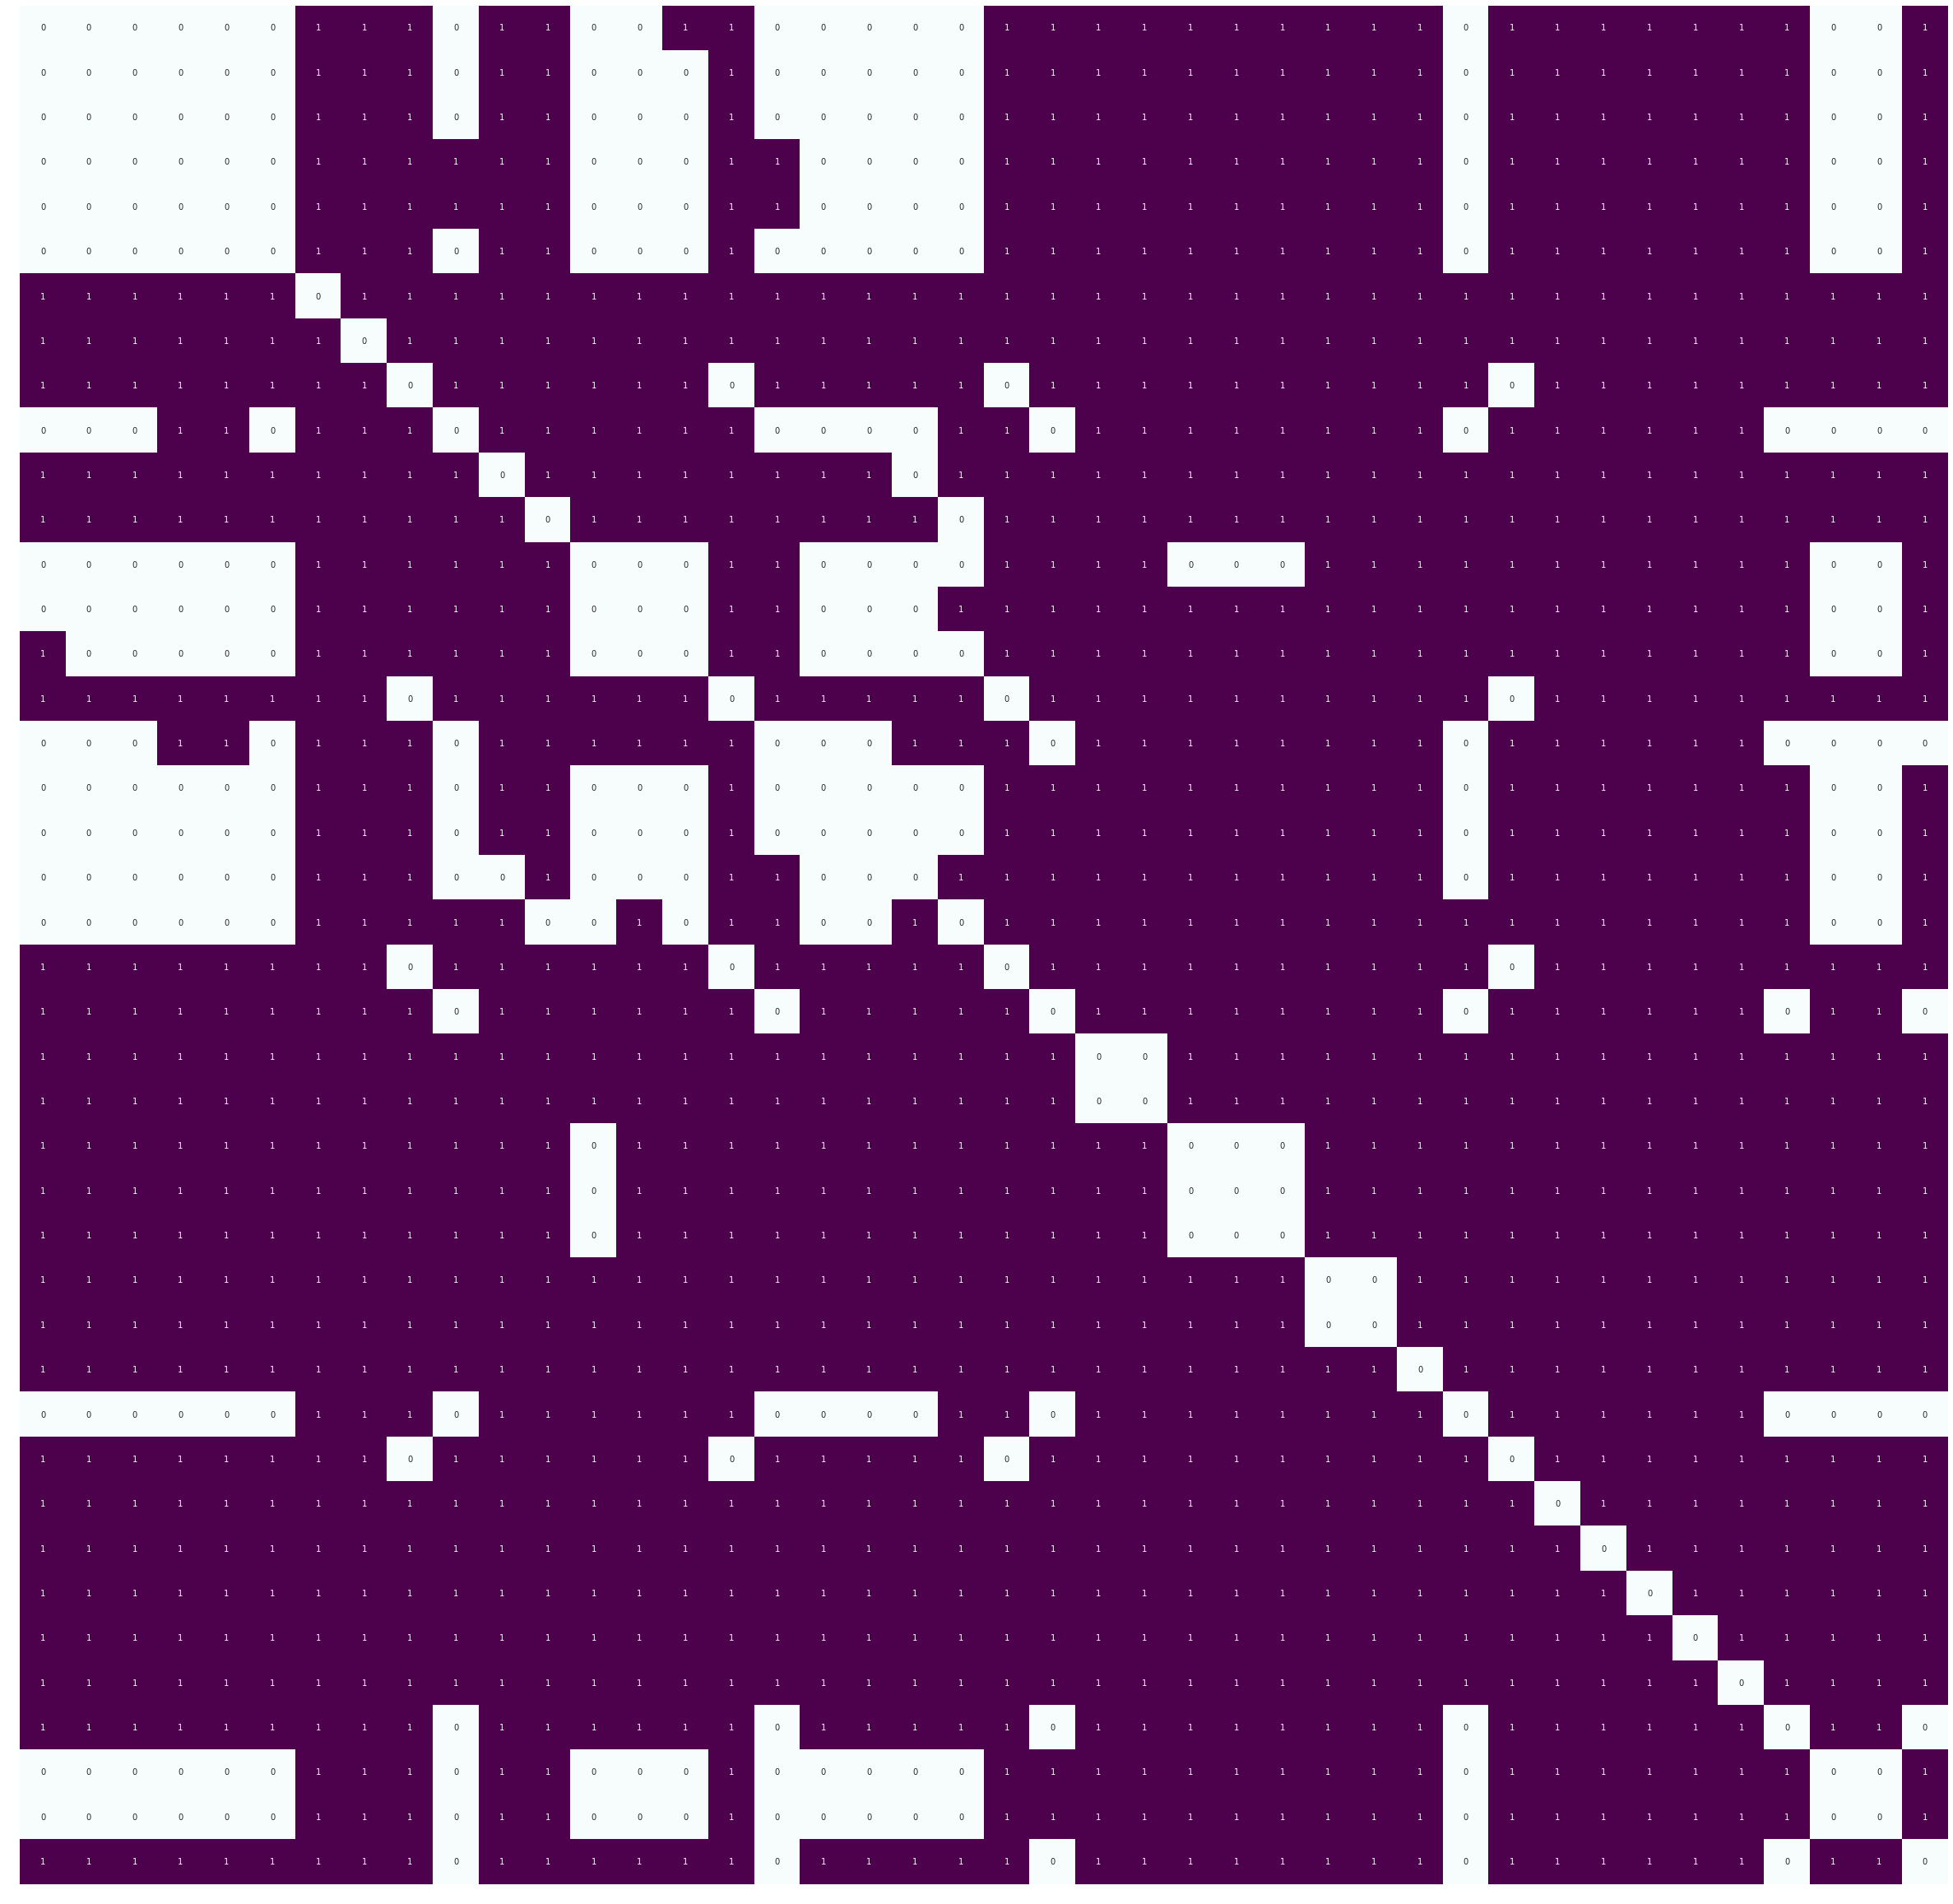

In [330]:
fig = plt.figure(figsize=(42, 42))
ax=plt.gca()
sns.heatmap(A.astype(int),annot=True, fmt="d", cbar=False,cmap="BuPu")
ax.set_axis_off()
plt.show()

In [333]:
nx.degree(T)

DegreeView({0: 25, 1: 1, 2: 1, 3: 3, 4: 1, 5: 1, 6: 15, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1})

In [331]:
import seaborn as sns

In [274]:
from matplotlib import pyplot as plt

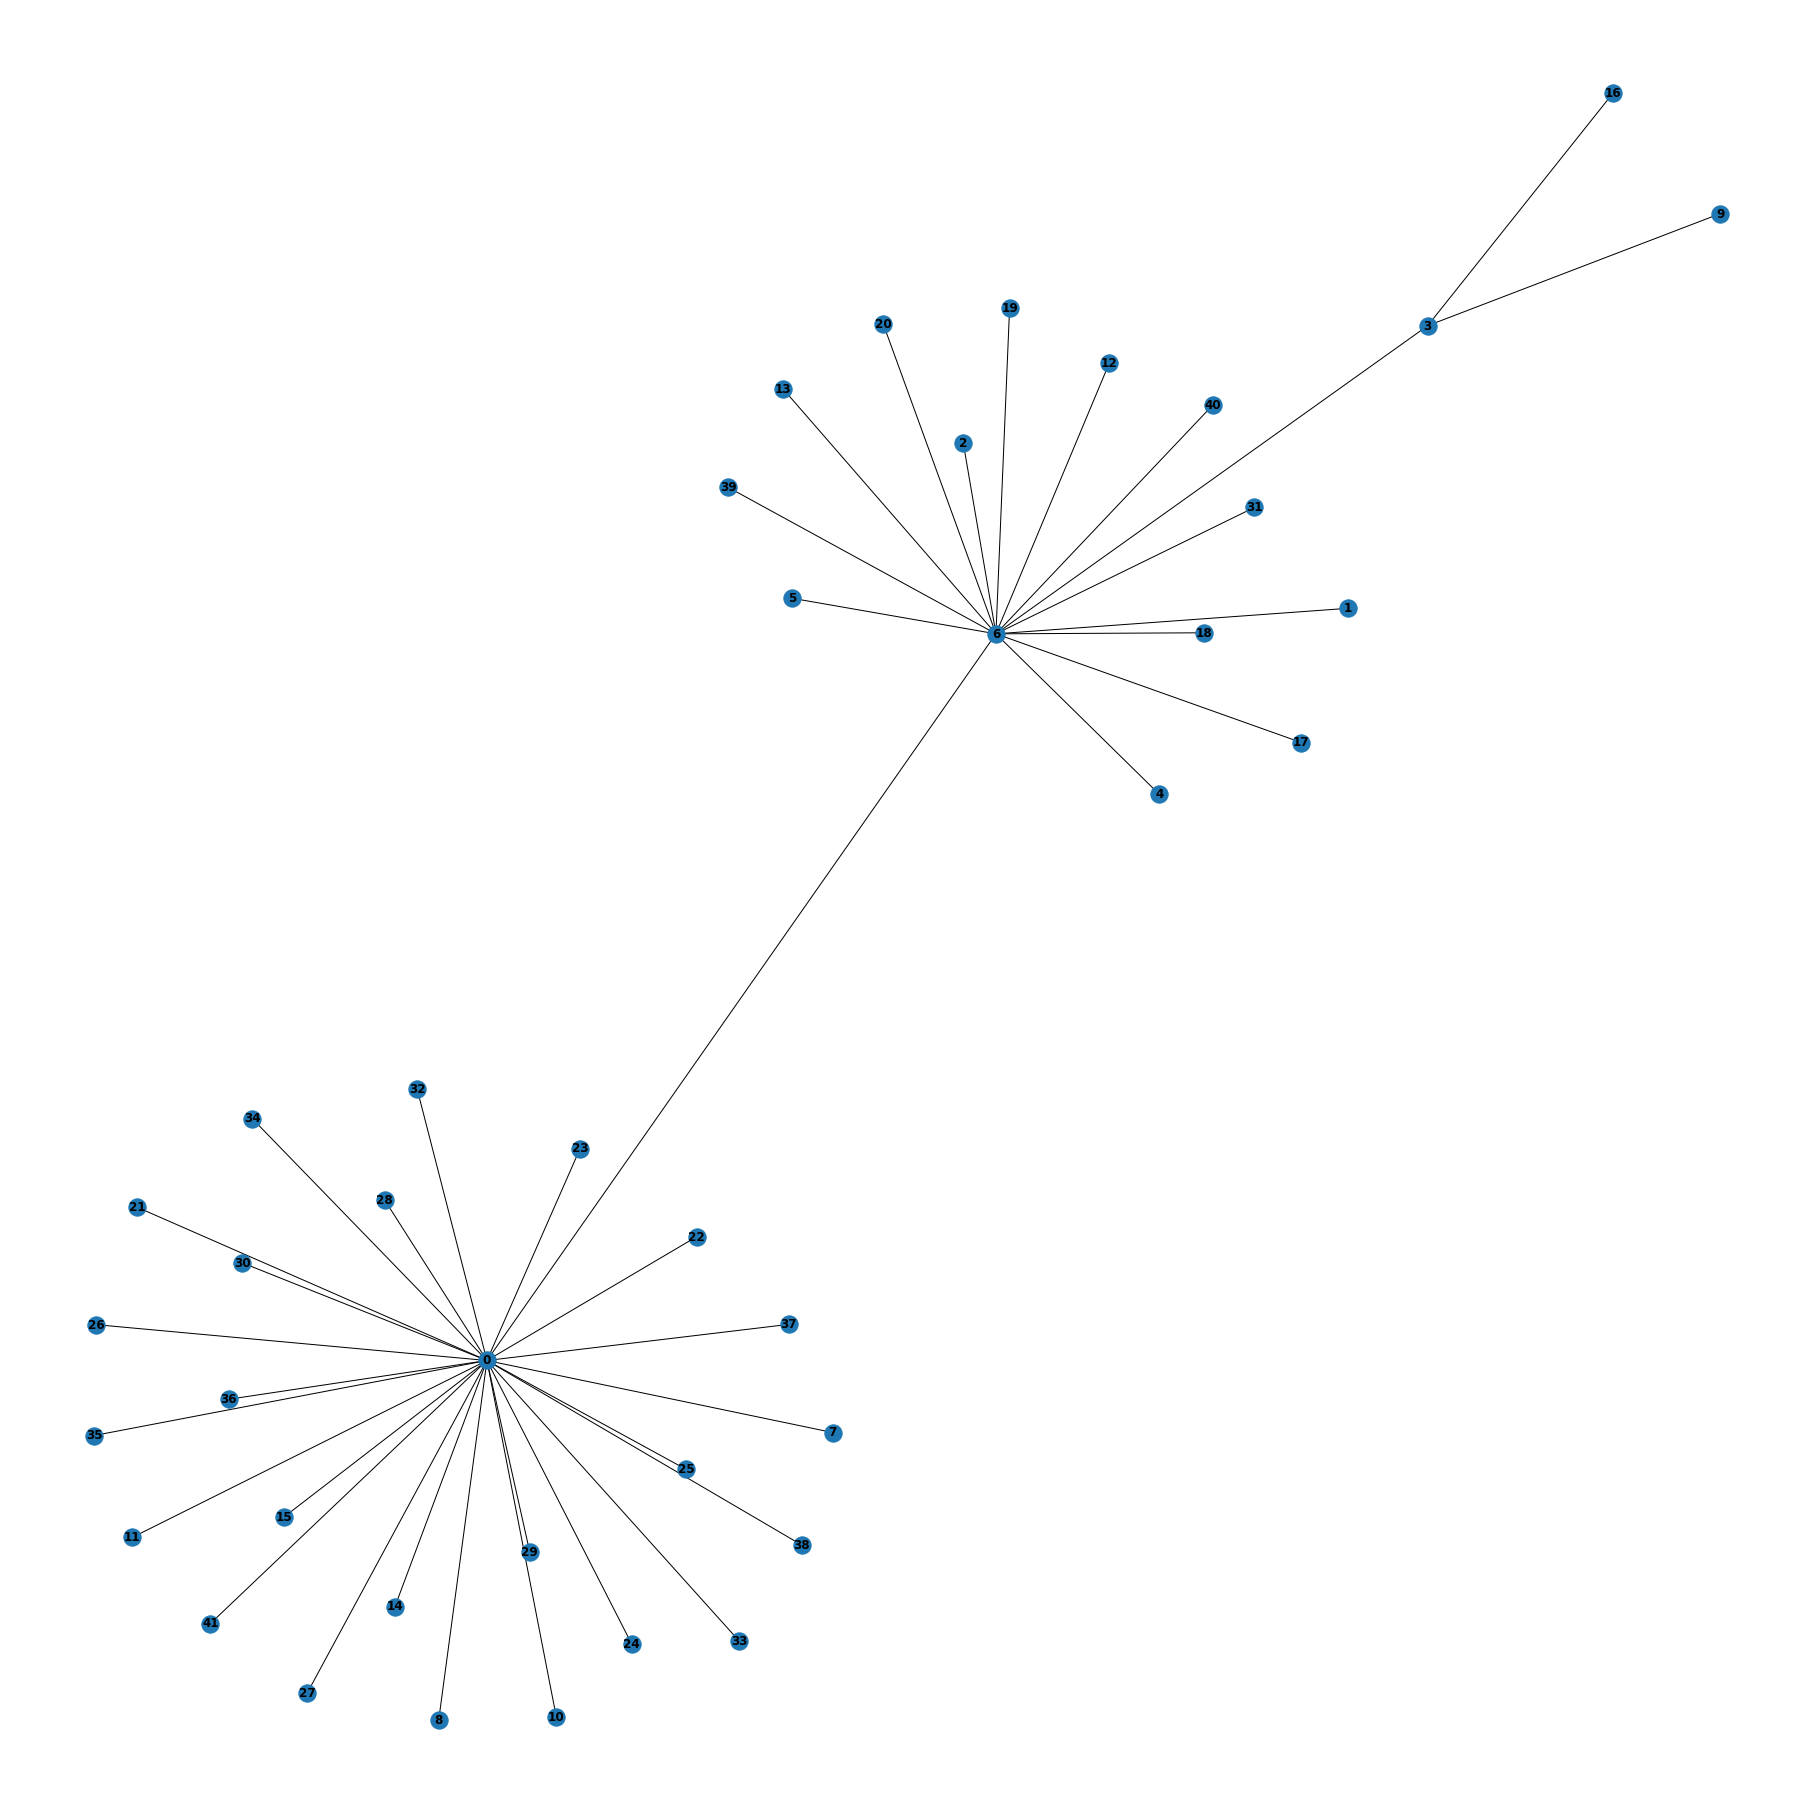

In [275]:
plt.figure(figsize=(25, 25))
nx.draw(T, with_labels=True, font_weight='bold')

In [349]:
# # Check for cycles in the graph, just to be sure
# nx.algorithms.cycles.find_cycle(T)a

In [296]:
D = np.zeros((A.shape[0], A.shape[1]))

In [297]:
for node, degree in T.degree():
    D[node][node] = degree

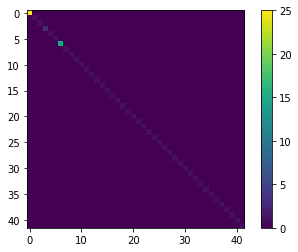

In [298]:
plt.imshow(D)
plt.colorbar()

In [299]:
L = nx.linalg.laplacian_matrix(T)

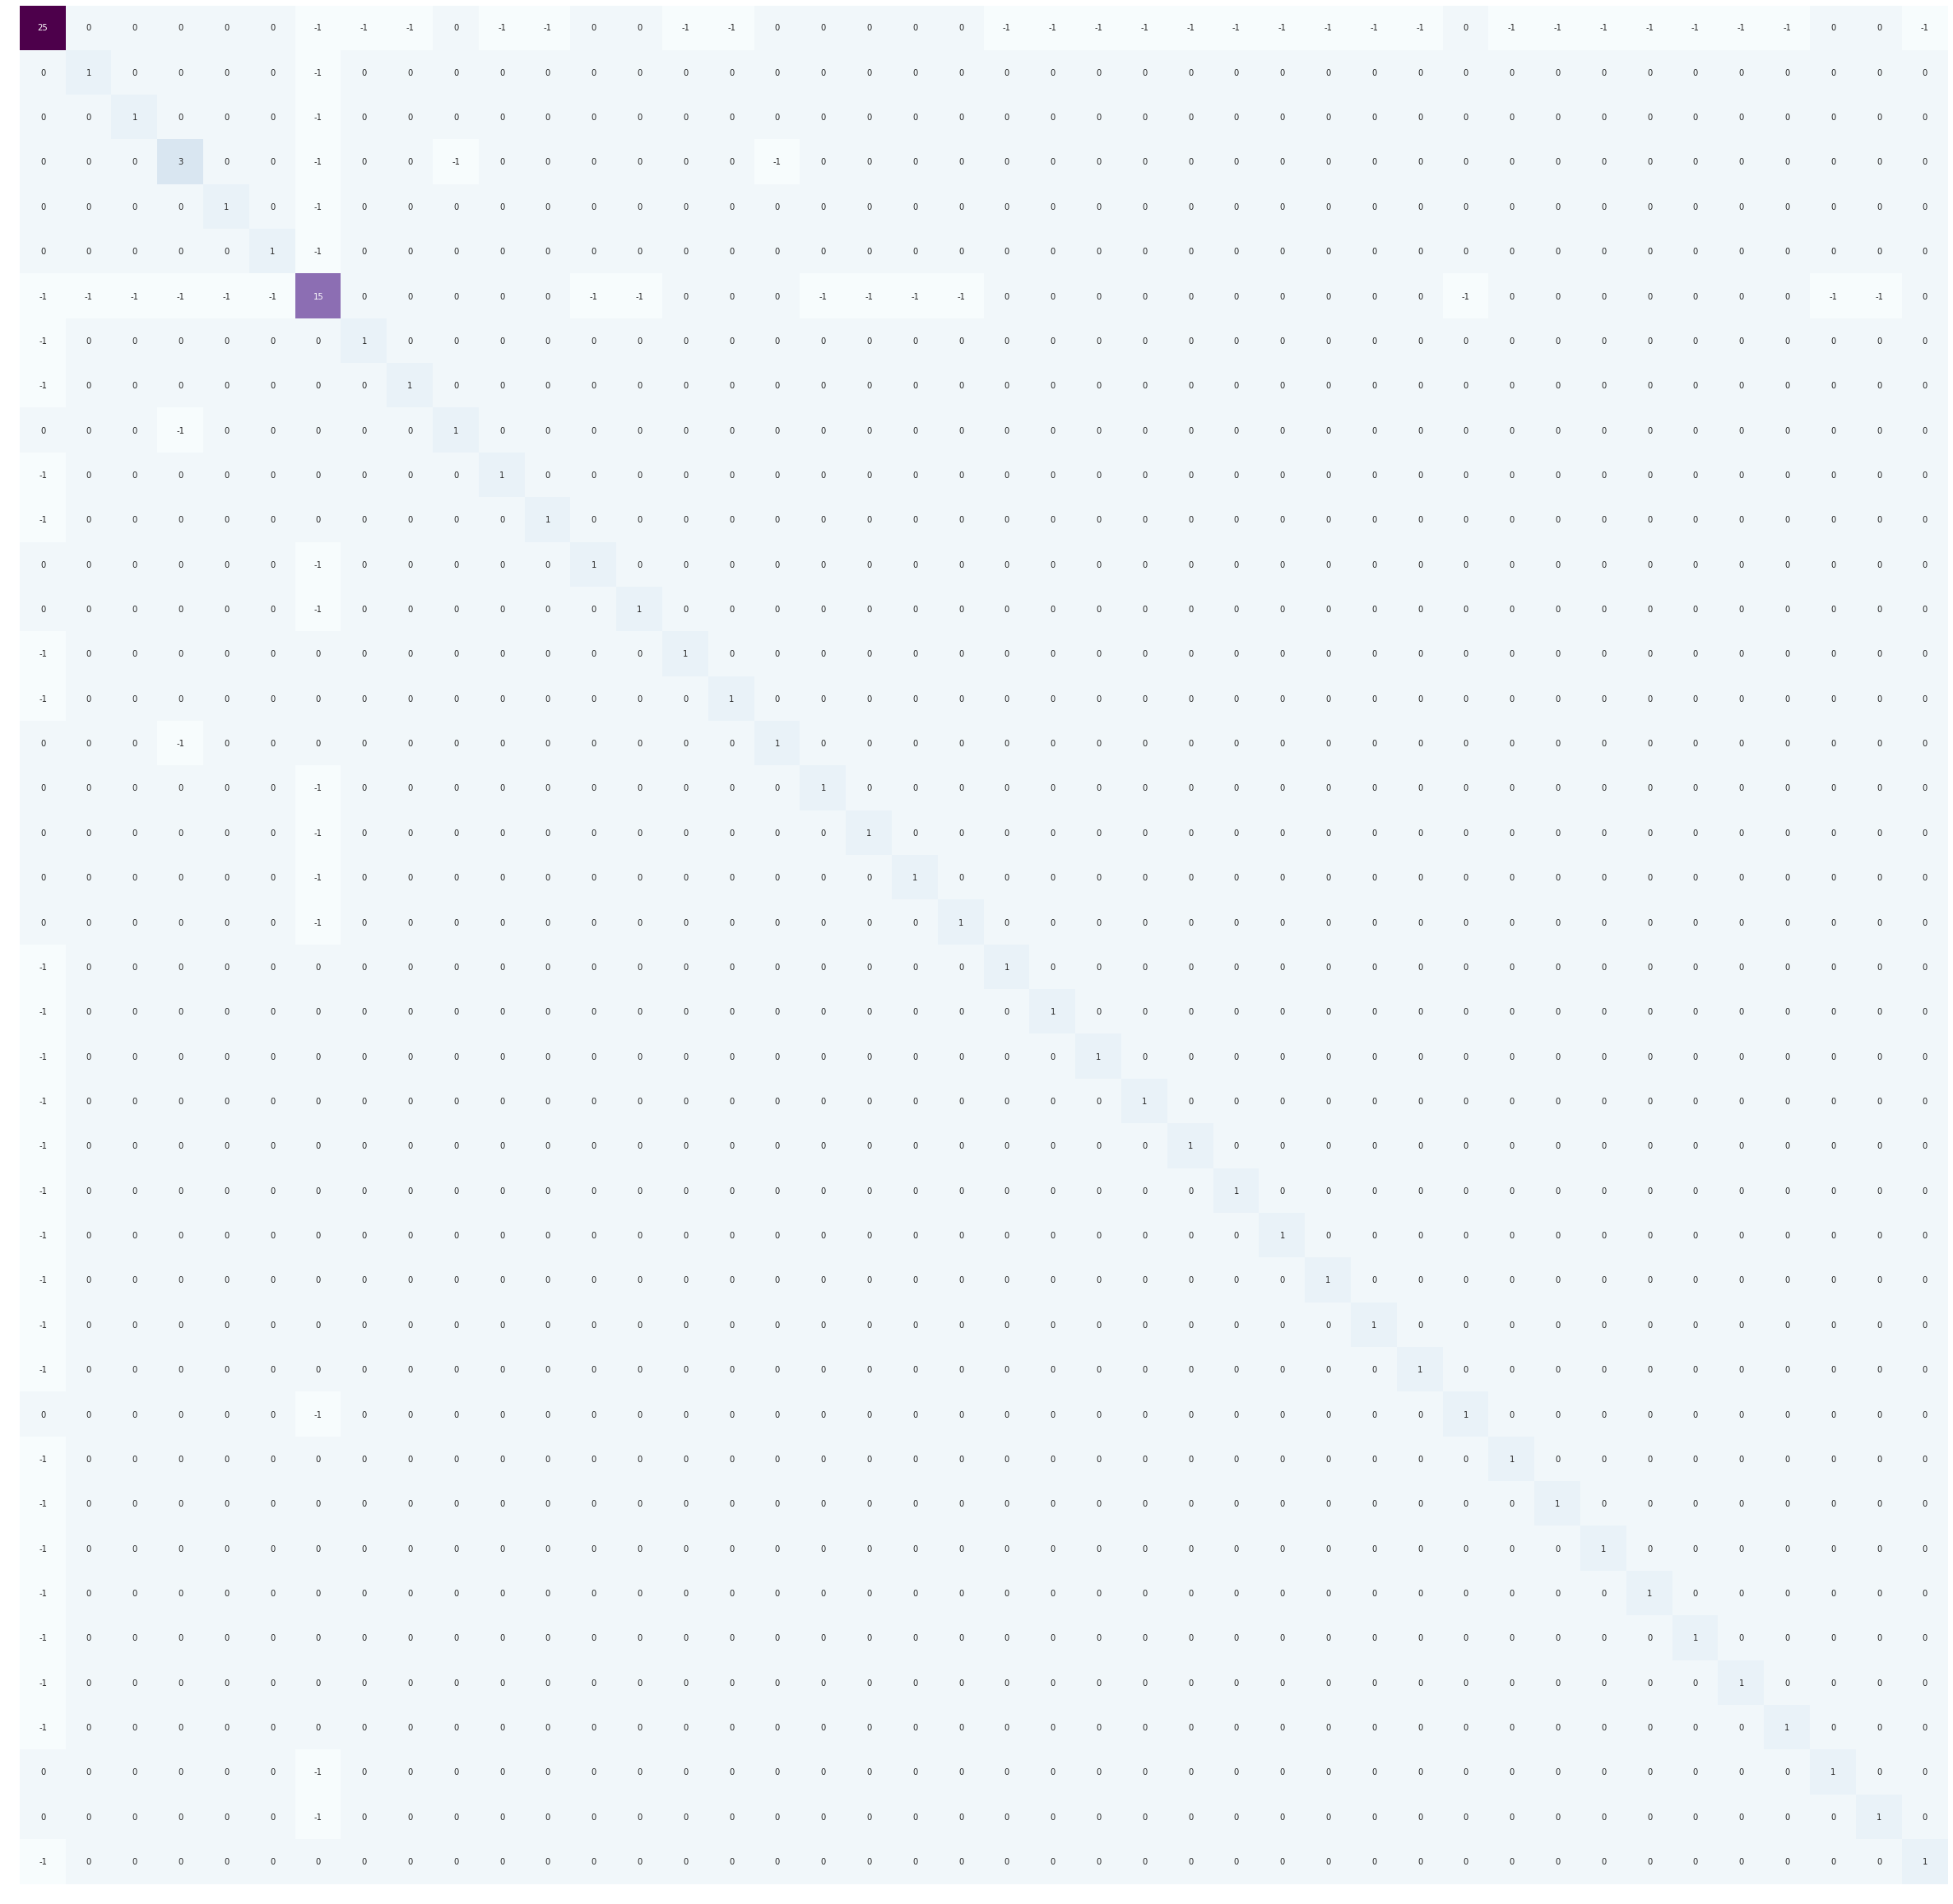

In [325]:
fig = plt.figure(figsize=(42,42))
ax=plt.gca()
sns.heatmap(L.toarray().astype(int),annot=True, fmt="d", cbar=False,cmap="BuPu")
ax.set_axis_off()
plt.show()

In [301]:
def eig_decompose_laplacian(L):
    eigvalues, eigvectors = np.linalg.eigh(L)
    idx = np.argsort(eigvalues)[::-1]
    sorted_eig = eigvalues[idx]
    sorted_eigv = eigvectors[idx]
    return (sorted_eig, sorted_eigv)

In [302]:
np.diag(np.dot(eigvectors, eigvectors.T))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [303]:
# L is a sparse compressed matrix
# Convert to dense before eigendecomposition
eigvalues, eigvectors = eig_decompose_laplacian(L.todense().astype(int))

In [304]:
eigvalues

array([ 2.60532795e+01,  1.58604051e+01,  3.68333770e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  3.15518316e-01,
        8.74594019e-02, -1.19103850e-15])

In [350]:
# Confirmed the eigenvalues and the unitary status of the eigenvectors of the Laplacian
# This was confirmed it using the pygsp module

In [355]:
X = np.array(df).transpose()

### The input_signal, $\matrix{X}$ is a graph signal
### $\matrix{X}$ $\in$ $\mathcal{R}^{NxF}$, 
### where $N$ is number of nodes and $F$ is the number of features

In [356]:
X.shape

(42, 75)

### Compute the graph Fourier Transform
### $\matrix{X}_{GFT}$ $=$ $\matrix{V}^{H}{X}$

### The column $i$, $\matrix{X}_{i}$ represents the graph signal for the $i^{th}$ patient

In [357]:
def compute_graph_fourier_transform(V, input_graph_signal):
    assert(X.shape[0] == V.shape[0])
    X_gft = np.dot(V.transpose(), input_graph_signal)
    return X_gft

In [358]:
X_gft = compute_graph_fourier_transform(eigvectors, X)

In [359]:
X_gft.shape

(42, 75)

In [360]:
X_gft

matrix([[ 1.38096746e+04,  4.60869372e+05,  2.29638492e+06, ...,
          7.93850273e+06,  2.14574636e+05,  1.79986056e+05],
        [ 9.40289806e+03,  3.43153465e+05,  1.60992236e+06, ...,
          5.76069617e+06,  1.59528094e+05,  1.38564997e+05],
        [-3.84787181e+03, -9.07041285e+04, -5.98879718e+05, ...,
         -1.78536406e+06, -4.25677106e+04, -2.86618244e+04],
        ...,
        [-1.72564547e+03, -3.38897841e+04, -2.57370526e+05, ...,
         -7.17677447e+05, -1.59843181e+04, -9.17454928e+03],
        [-4.99330758e+02, -1.69682310e+04, -8.14387891e+04, ...,
         -2.87349581e+05, -7.89310524e+03, -6.77548217e+03],
        [ 3.28173745e+03,  1.12685491e+05,  5.51055914e+05, ...,
          1.92539073e+06,  5.24396981e+04,  4.44813623e+04]])